### Change Point Detection on the Buy and Sell arrival rates $ \epsilon_B, \epsilon_S$

In [2]:
! pip install ruptures

In [3]:
import ruptures as rpt  # our package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/home/jovyan/HFT_Research/PIN_Research/params/hourly_params.csv')
alpha=df['Alpha']
delta=df['Delta']
buys=df['Buy']
sells=df['Sell']
information=df['Mu']
prob=df['prob']

### Buy and Sell Arrival Rates

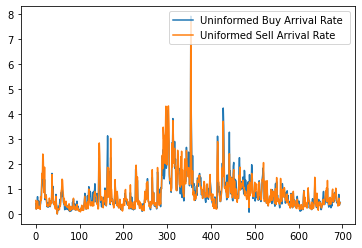

In [5]:
plt.plot(buys,label='Uninformed Buy Arrival Rate ')
plt.plot(sells,label='Uniformed Sell Arrival Rate')

plt.legend()

Here we applied change point detection using PELT with either a L1 or L2 Cost Function for offline change point detection



In [12]:
algo = rpt.Pelt(min_size=50,model="l1").fit(buys.dropna().values)
result = np.array(algo.predict(pen=.01))

print(result)

[ 65 120 175 230 285 360 425 495 580 630 696]


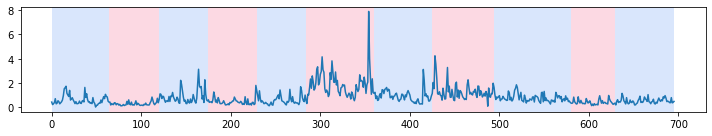

In [13]:
fig, ax_array = rpt.display(buys, result)

Pruned Exact Linear Time
- Pass in a penalty coefficient that prevents overfitting of changepoints

In [9]:
algo = rpt.Pelt(min_size=50,model="l2").fit(buys.dropna().values)
result = np.array(algo.predict(pen=0.005))

print(result)

[ 65 120 175 225 285 360 415 480 530 580 635 696]


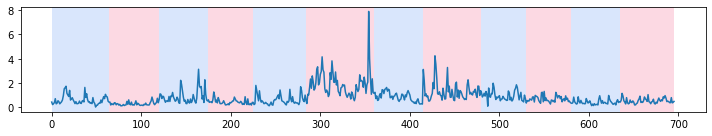

In [10]:
fig, ax_array = rpt.display(buys, result)

### Information

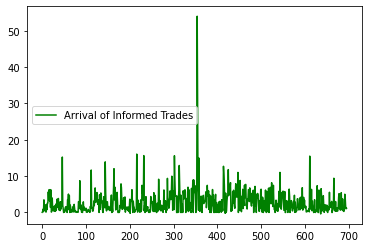

In [11]:
plt.plot(information,label='Arrival of Informed Trades',color='green')

plt.legend()

In [12]:
algo = rpt.Pelt(min_size=50,model="l1").fit(information.dropna().values)
result = np.array(algo.predict(pen=0.005))

print(result)

[ 65 120 170 230 285 360 415 495 555 605 696]


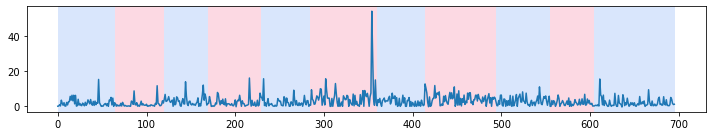

In [13]:
fig, ax_array = rpt.display(information, result)

In [14]:
algo = rpt.Pelt(min_size=50,model="l1").fit(prob.dropna().values)
result = np.array(algo.predict(pen=0.005))

print(result)

[ 80 130 210 290 340 390 440 550 600 695]


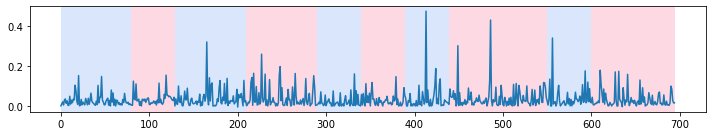

In [15]:
fig, ax_array = rpt.display(prob.dropna(), result)